In [1]:
import pandas as pd
import numpy as np

In [2]:
%store -r df
%store -r df_credit
%store -r df_credit_bureau


# Merging the different datasets to train dataset

We got different datasets where we did some feature engineering. This notebook is for merging it all together in one notebook. We will use the SK_ID_CURR column which is unique for every application

In [3]:
#merging the credit-dataset / credit-ratio
df_credit = pd.merge(df,df_credit, how="left", on="SK_ID_CURR")



In [4]:
# merging the credit bureau dataset

df_all_rows = pd.merge(df_credit,df_credit_bureau, how="left", on="SK_ID_CURR")

In [5]:
df_all_rows.sample(10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,...,MONTHS_BALANCE,CREDIT_RATIO,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
56070,164990,0,0,675000.0,0.028663,-20111,365243,-2717.0,-3583,0,...,NaN,NaN,6.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0
155752,280571,0,3,851778.0,0.010643,-13059,-4586,-4203.0,-1073,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34257,139701,0,2,840996.0,0.031329,-18228,-944,-1511.0,-1502,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237187,374766,0,0,238500.0,0.015221,-12136,-1137,-511.0,-3250,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244619,383158,0,0,270000.0,0.014520,-14768,-1802,-694.0,-4221,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38868,145029,0,0,808650.0,0.019689,-22775,365243,-9059.0,-4496,1,...,-4.0,0.501584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279347,423637,0,0,545040.0,0.035792,-16932,-1872,-2851.0,-480,0,...,NaN,NaN,48.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
199766,331619,0,0,547344.0,0.018029,-17943,-10787,-2829.0,-1485,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284627,429686,0,0,513040.5,0.018634,-16622,-3467,-8666.0,-161,0,...,NaN,NaN,26.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0
16076,118757,0,2,900000.0,0.030755,-12099,-3788,-1487.0,-4773,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Merging Test-dataset

In [6]:
test_df  = pd.read_csv("data/application_train.csv")


In [7]:
# only the colums of our train dataset are interesting

cols = df.columns.tolist()

#test_df[cols]


# Splitting into two datasets

Here we split into two datasets. One small dataset which only takes full information into account (df_full_info)
and one where we fill the missing values (df_all_rows)

In [8]:
df_full_info = df_all_rows.dropna()

df_full_info.groupby("TARGET").mean()

,SK_ID_CURR,CNT_CHILDREN,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,FLAG_EMAIL,...,MONTHS_BALANCE,CREDIT_RATIO,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
TARGET,,,,,,,,,,,,,,,,,,,,,
0,278506.344271,0.417232,592262.603156,0.021751,-16084.310758,54294.185998,-4955.803312,-3062.067099,0.281190,0.123028,...,-20.616137,0.296807,57.398134,1.711842,0.163730,0.056371,0.038785,0.396033,81.728875,33.199159
1,277838.659464,0.480192,552755.128451,0.019795,-15141.823930,34092.358543,-4431.008804,-2853.392157,0.234094,0.112845,...,-17.130456,0.443226,54.242097,1.941176,0.190476,0.074830,0.056022,0.456583,63.946379,28.708283


In [9]:
df_full_info.drop("SK_ID_CURR", axis = 1, inplace=True)
df_full_info.head()
df_full_info.shape

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(29623, 75)

In [10]:
df_full_info.dropna(inplace=True)

/Users/marcelmeyer/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


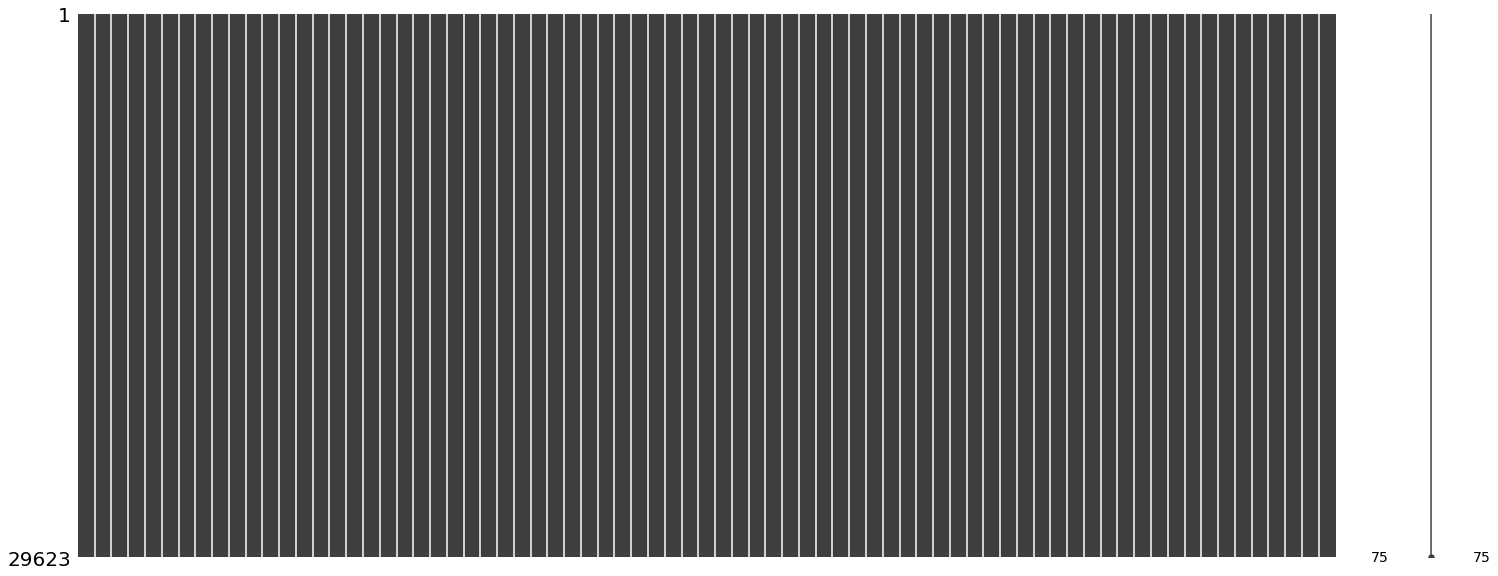

In [11]:
import missingno as msno
msno.matrix(df_full_info)

In [12]:
# resetting index before scaling
df_full_info.reset_index(inplace=True, drop=True)

df_full_info.dtypes

TARGET                                     int64
CNT_CHILDREN                               int64
AMT_CREDIT                               float64
REGION_POPULATION_RELATIVE               float64
DAYS_BIRTH                                 int64
DAYS_EMPLOYED                              int64
DAYS_REGISTRATION                        float64
DAYS_ID_PUBLISH                            int64
FLAG_PHONE                                 int64
FLAG_EMAIL                                 int64
CNT_FAM_MEMBERS                          float64
LIVE_CITY_NOT_WORK_CITY                    int64
DAYS_LAST_PHONE_CHANGE                   float64
AMT_REQ_CREDIT_BUREAU_YEAR               float64
EXT_SOURCE_AVG                           float64
ANNUITY_INCOME_RAT                       float64
SOCIAL_CIRCLE_AVG                        float64
REGION_RATING_BOOST                        int64
REGION_MISMATCH                            int64
AMT_REQ_CREDIT_BUREAU_QUARTER_SUM        float64
TECH_SCORE          

In [13]:
df_full_info.isna().sum()[df_full_info.isna().sum() >0]

Series([], dtype: int64)

In [14]:
numerical_features = df_full_info.select_dtypes(
    include = ["int64", "float64"]).drop("TARGET", axis=1)
categorical_features = df_full_info.select_dtypes(
    exclude = ["int", "float"])

In [15]:
numerical_features.shape

(29623, 30)

In [16]:
from sklearn.preprocessing import StandardScaler


#scaling numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(numerical_features)

df_numerical = pd.DataFrame(data = scaled_numerical, columns=numerical_features.columns)

df_full_info_scaled = pd.concat([df_full_info["TARGET"],df_numerical, categorical_features], axis=1, sort=False)


In [17]:
%store df_full_info
%store df_full_info_scaled
%store df_all_rows

Stored 'df_full_info' (DataFrame)
Stored 'df_full_info_scaled' (DataFrame)
Stored 'df_all_rows' (DataFrame)


In [18]:
df_full_info.groupby("TARGET").count()

,CNT_CHILDREN,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,MONTHS_BALANCE,CREDIT_RATIO,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
TARGET,,,,,,,,,,,,,,,,,,,,,
0,27124,27124,27124,27124,27124,27124,27124,27124,27124,27124,...,27124,27124,27124,27124,27124,27124,27124,27124,27124,27124
1,2499,2499,2499,2499,2499,2499,2499,2499,2499,2499,...,2499,2499,2499,2499,2499,2499,2499,2499,2499,2499
